In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score 
from pydataset import data
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder



In [ ]:
df = pd.read_csv('/content/car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
#columns name are rename based on information about data from this"https://archive.ics.uci.edu/ml/datasets/car+evaluation" link
df.rename(columns ={"vhigh" : " buying_cost" , "vhigh.1" : "maintainanace_cost" , "2" : "doors" , "2.1" : "persons" , "small" : "lug_boot" , "low" : "safety" } , inplace = True)
df.columns


Index([' buying_cost', 'maintainanace_cost', 'doors', 'persons', 'lug_boot',
       'safety', 'unacc'],
      dtype='object')

In [ ]:
df.dtypes

 buying_cost          object
maintainanace_cost    object
doors                 object
persons               object
lug_boot              object
safety                object
unacc                 object
dtype: object

In [ ]:
df = df.apply(LabelEncoder().fit_transform) # LabelEncoding shortcut technique
df

,buying_cost,maintainanace_cost,doors,persons,lug_boot,safety,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


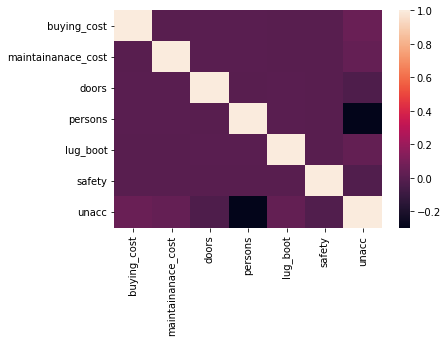

In [ ]:
sns.heatmap(df.corr())

In [ ]:
#split data 
X = df.drop(["unacc"] , axis = 1)
y = df.iloc[: , -1 ]


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size =0.33 , random_state = 1)

In [ ]:
model = RandomForestClassifier()
model.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
predict_y = model.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test,predict_y)*100.0

accuracy

94.56140350877193